<a href="https://colab.research.google.com/github/flaviopradoaquino/trabalhokafka/blob/main/Projeto_M%C3%B3dulo_Kafka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Análise Inicial**

In [16]:
!pip install requests
!pip install beautifulsoup4
!pip install matplotlib
!pip install numpy

In [41]:
##### Extraindo dados da URL e armazenando o resultado em um Dataframe e um CSV.
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.undp.org/pt/brazil/idhm-municipios-2010"
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table')
    if table:
        df_idh = pd.read_html(str(table))[0]
        df_idh['Estado'] = df['Município'].str[-3:-1]
        df_idh
        df_idh.to_csv('dados_idh_municipios_2010.csv', index=False)
    else:
        print("Nenhuma tabela encontrada na página.")
else:
    print(f"Falha ao acessar a página. Código de status: {response.status_code}")

In [43]:
df_idh

,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010,Estado
0,1 º,São Caetano do Sul (SP),862,0891,0887,811,SP
1,2 º,Águas de São Pedro (SP),854,0849,0890,825,SP
2,3 º,Florianópolis (SC),847,0870,0873,800,SC
3,4 º,Balneário Camboriú (SC),845,0854,0894,789,SC
4,4 º,Vitória (ES),845,0876,0855,805,ES
...,...,...,...,...,...,...,...
5560,5560 º,Uiramutã (RR),453,0439,0766,276,RR
5561,5562 º,Marajá do Sena (MA),452,0400,0774,299,MA
5562,5563 º,Atalaia do Norte (AM),450,0481,0733,259,AM
5563,5564 º,Fernando Falcão (MA),443,0417,0728,286,MA


In [44]:
### Ranking das melhores médias do IDH dos municípios agrupado por Estado
df_media_estado = df.groupby('Estado')['IDHM 2010'].mean().reset_index()
df_media_estado = df_media_estado.sort_values(by='IDHM 2010', ascending=False)
df_media_estado

,Estado,IDHM 2010
6,DF,824.000000
25,SP,739.527132
23,SC,731.648464
22,RS,713.530242
18,RJ,708.913043
17,PR,701.959900
8,GO,694.983740
7,ES,692.192308
12,MT,684.290780
11,MS,679.705128


In [45]:
### Ranking das melhores médias do IDH de Educação dos municípios agrupado por Estado
df_media_estado = df.groupby('Estado')['IDHM Educação 2010'].mean().reset_index()
df_media_estado = df_media_estado.sort_values(by='IDHM Educação 2010', ascending=False)
df_media_estado

,Estado,IDHM Educação 2010
6,DF,742.000000
25,SP,676.336434
23,SC,636.522184
18,RJ,620.902174
17,PR,611.045113
22,RS,600.713710
8,GO,596.073171
7,ES,591.358974
12,MT,576.992908
11,MS,557.410256


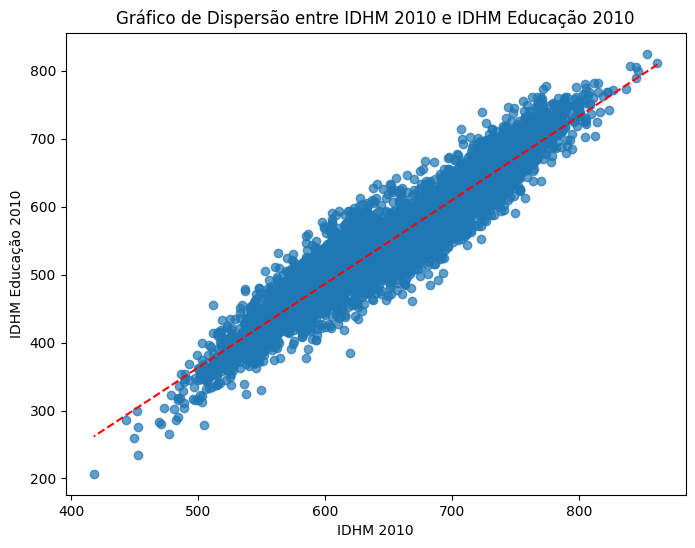

Correlação entre IDHM 2010 e IDHM Educação 2010: 0.950875286965987


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('dados_idh_municipios_2010.csv')
colunas_interesse = ['IDHM 2010', 'IDHM Educação 2010']
df_interesse = df[colunas_interesse]

# Calcular a matriz de correlação
correlacao = df_interesse.corr().loc['IDHM 2010', 'IDHM Educação 2010']

# Criar um gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df_interesse['IDHM 2010'], df_interesse['IDHM Educação 2010'], alpha=0.7)
plt.title('Gráfico de Dispersão entre IDHM 2010 e IDHM Educação 2010')
plt.xlabel('IDHM 2010')
plt.ylabel('IDHM Educação 2010')

# Adicionar linha de regressão
z = np.polyfit(df_interesse['IDHM 2010'], df_interesse['IDHM Educação 2010'], 1)
p = np.poly1d(z)
plt.plot(df_interesse['IDHM 2010'], p(df_interesse['IDHM 2010']), 'r--')

# Exibir o gráfico
plt.show()

# Exibir o valor da correlação
print(f"Correlação entre IDHM 2010 e IDHM Educação 2010: {correlacao}")


In [47]:
# Calcular a diferença em porcentagem ente os campos IDHM 2010 e IDHM Educação 2010
df_idh['Diferenca_Porcentagem'] = ((df_idh['IDHM 2010'] - df_idh['IDHM Educação 2010']) / df_idh['IDHM 2010']) * 100
df_idh

,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010,Estado,Diferenca_Porcentagem
0,1 º,São Caetano do Sul (SP),862,0891,0887,811,SP,5.916473
1,2 º,Águas de São Pedro (SP),854,0849,0890,825,SP,3.395785
2,3 º,Florianópolis (SC),847,0870,0873,800,SC,5.548996
3,4 º,Balneário Camboriú (SC),845,0854,0894,789,SC,6.627219
4,4 º,Vitória (ES),845,0876,0855,805,ES,4.733728
...,...,...,...,...,...,...,...,...
5560,5560 º,Uiramutã (RR),453,0439,0766,276,RR,39.072848
5561,5562 º,Marajá do Sena (MA),452,0400,0774,299,MA,33.849558
5562,5563 º,Atalaia do Norte (AM),450,0481,0733,259,AM,42.444444
5563,5564 º,Fernando Falcão (MA),443,0417,0728,286,MA,35.440181


In [48]:
##### Exportar o resultado para o CSV Final
df_idh.to_csv('dados_idh_mun_2010_final.csv', index=False)

### **Kafka**

In [24]:
#Checando a versão Java instalada
!java -version

openjdk version "11.0.22" 2024-01-16
OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1)
OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)


In [25]:
#Instalando Java 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# -q, quiet level 2: no output except for errors
#> /dev/null on the end of any command where you want to redirect all the stdout into nothingness

In [26]:
#Mudando a versão do Java para usar como padrão
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [27]:
#Mudando a versão do javac para usar como padrão
!update-alternatives --set javac /usr/lib/jvm/java-8-openjdk-amd64/bin/javac

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/javac to provide /usr/bin/javac (javac) in manual mode


In [28]:
#Mudando a versão do jps para usar como padrão
!update-alternatives --set jps /usr/lib/jvm/java-8-openjdk-amd64/bin/jps

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/jps to provide /usr/bin/jps (jps) in manual mode


In [29]:
#Checando a versão de Java padrão
!java -version

openjdk version "1.8.0_392"
OpenJDK Runtime Environment (build 1.8.0_392-8u392-ga-1~22.04-b08)
OpenJDK 64-Bit Server VM (build 25.392-b08, mixed mode)


In [31]:
#importando o módeulo OS
import os
#Criando as variáveis de ambiente
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["JRE_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64/jre"
os.environ["PATH"] += ":$JAVA_HOME/bin:$JRE_HOME/bin:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"

In [32]:
#Instala o pacote
!pip install kafka-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 4.6 MB/s eta 0:00:00


In [33]:
#Importa as bibliotecas
import os
from datetime import datetime
import time
import json
from json import loads
from csv import DictReader
from kafka import KafkaProducer
from kafka import KafkaConsumer
import pandas as pd
from pandas.io.json import json_normalize

In [34]:
#Baixar e descompactar o Kafka (5 minutos)
!curl -sSOL https://archive.apache.org/dist/kafka/3.4.0/kafka_2.13-3.4.0.tgz
!tar -xzf kafka_2.13-3.4.0.tgz
#Remover o arquivo compactado
!rm kafka_2.13-3.4.0.tgz

In [35]:
#Copiando os arquivos do kafka para user/local
!cp -r kafka_2.13-3.4.0 /usr/local/
#-r copia diretórios recursivamente

In [36]:
#Verificando os arquivos no diretório bin do Kafka
!ls /usr/local/kafka_2.13-3.4.0/bin

connect-distributed.sh	      kafka-dump-log.sh		     kafka-server-stop.sh
connect-mirror-maker.sh       kafka-features.sh		     kafka-storage.sh
connect-standalone.sh	      kafka-get-offsets.sh	     kafka-streams-application-reset.sh
kafka-acls.sh		      kafka-leader-election.sh	     kafka-topics.sh
kafka-broker-api-versions.sh  kafka-log-dirs.sh		     kafka-transactions.sh
kafka-cluster.sh	      kafka-metadata-quorum.sh	     kafka-verifiable-consumer.sh
kafka-configs.sh	      kafka-metadata-shell.sh	     kafka-verifiable-producer.sh
kafka-console-consumer.sh     kafka-mirror-maker.sh	     trogdor.sh
kafka-console-producer.sh     kafka-producer-perf-test.sh    windows
kafka-consumer-groups.sh      kafka-reassign-partitions.sh   zookeeper-security-migration.sh
kafka-consumer-perf-test.sh   kafka-replica-verification.sh  zookeeper-server-start.sh
kafka-delegation-tokens.sh    kafka-run-class.sh	     zookeeper-server-stop.sh
kafka-delete-records.sh       kafka-server-start.sh	     zookeep

In [37]:
#Verificando os arquivos no diretório config do Kafka
!ls /usr/local/kafka_2.13-3.4.0/config

connect-console-sink.properties    connect-mirror-maker.properties  server.properties
connect-console-source.properties  connect-standalone.properties    tools-log4j.properties
connect-distributed.properties	   consumer.properties		    trogdor.conf
connect-file-sink.properties	   kraft			    zookeeper.properties
connect-file-source.properties	   log4j.properties
connect-log4j.properties	   producer.properties


In [38]:
#Usando as configurações padrão (fornecidas pelo Apache Kafka) para ativar as instâncias do Zookeper e do Kafka.
!./kafka_2.13-3.4.0/bin/zookeeper-server-start.sh -daemon ./kafka_2.13-3.4.0/config/zookeeper.properties
!./kafka_2.13-3.4.0/bin/kafka-server-start.sh -daemon ./kafka_2.13-3.4.0/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


In [39]:
#Lista de processos
!ps -ef | grep kafka

root       22971     214  0 15:45 ?        00:00:00 /bin/bash -c ps -ef | grep kafka
root       22973   22971  0 15:45 ?        00:00:00 grep kafka


In [49]:
#Realize o download da base de dados IDH 2010
!wget --quiet --show-progress dados_idh_mun_2010_final.csv

In [51]:
ls -l dados_idh_mun_2010_final.csv

-rw-r--r-- 1 root root 363134 Mar  3 15:51 dados_idh_mun_2010_final.csv


In [50]:
#Inicializar o cliente Kafka Producer
producer = KafkaProducer(bootstrap_servers=['localhost:9092'])

print(f'Iniciando o Kafka producer at {datetime.utcnow()}')

Iniciando o Kafka producer at 2024-03-03 15:51:42.543027


In [52]:
#Realiza a leitura do arquivo csv, converte para o formato dicionário e envia as mensagens para o tópico com o producer
topic_name = 'data-topic1'
counter = 0
with open('/content/dados_idh_mun_2010_final.csv','r') as new_obj:
    csv_dict_reader = DictReader(new_obj)
    for row in csv_dict_reader:
      key = str(counter).encode('utf-8')
      ack = producer.send(topic=topic_name, key=key, value=json.dumps(row).encode('utf-8'))
      metadata = ack.get()
      counter = counter + 1
      print(metadata.topic, metadata.partition, key)

producer.flush()
print("Wrote {0} messages into topic: {1}".format(counter, topic_name))

A saída de streaming foi truncada nas últimas 5000 linhas.
data-topic1 0 b'566'
data-topic1 0 b'567'
data-topic1 0 b'568'
data-topic1 0 b'569'
data-topic1 0 b'570'
data-topic1 0 b'571'
data-topic1 0 b'572'
data-topic1 0 b'573'
data-topic1 0 b'574'
data-topic1 0 b'575'
data-topic1 0 b'576'
data-topic1 0 b'577'
data-topic1 0 b'578'
data-topic1 0 b'579'
data-topic1 0 b'580'
data-topic1 0 b'581'
data-topic1 0 b'582'
data-topic1 0 b'583'
data-topic1 0 b'584'
data-topic1 0 b'585'
data-topic1 0 b'586'
data-topic1 0 b'587'
data-topic1 0 b'588'
data-topic1 0 b'589'
data-topic1 0 b'590'
data-topic1 0 b'591'
data-topic1 0 b'592'
data-topic1 0 b'593'
data-topic1 0 b'594'
data-topic1 0 b'595'
data-topic1 0 b'596'
data-topic1 0 b'597'
data-topic1 0 b'598'
data-topic1 0 b'599'
data-topic1 0 b'600'
data-topic1 0 b'601'
data-topic1 0 b'602'
data-topic1 0 b'603'
data-topic1 0 b'604'
data-topic1 0 b'605'
data-topic1 0 b'606'
data-topic1 0 b'607'
data-topic1 0 b'608'
data-topic1 0 b'609'
data-topic1 0 b'6

In [66]:
#Criar um consumidor todas as mensagens do tópico, mas sem marcar como 'lidas' (enable_auto_commit=False)
#para que seja possível ler várias vezes.
consumer = KafkaConsumer(topic_name,
                         group_id = 'Topicos',
                         bootstrap_servers=['localhost:9092'],
                         value_deserializer=lambda m: json.loads(m.decode('utf-8')),
                         auto_offset_reset ='earliest',
                         enable_auto_commit=False,
                         consumer_timeout_ms = 10000
                         )

In [67]:
#Ler o consumidor, concatenar todas as linhas, normalizando o json
lista = []

for message in consumer:
    global combined
    data = pd.json_normalize(message.value)
    lista.append(data)

Conj_IDH = pd.concat(lista)

In [68]:
#Visualizar os 5 primeiras linhas
Conj_IDH.head(5)

,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010,Estado,Diferenca_Porcentagem
0,1 º,São Caetano do Sul (SP),862,0891,0887,811,SP,5.916473317865429
0,2 º,Águas de São Pedro (SP),854,0849,0890,825,SP,3.395784543325527
0,3 º,Florianópolis (SC),847,0870,0873,800,SC,5.548996458087367
0,4 º,Balneário Camboriú (SC),845,0854,0894,789,SC,6.627218934911243
0,4 º,Vitória (ES),845,0876,0855,805,ES,4.733727810650888


### **Pré Processamento**

In [69]:
# Renomear o campo Diferenca_Porcentagem para Dif Porcentagem
Conj_IDH = Conj_IDH.rename(columns={'Diferenca_Porcentagem': 'Dif % Educação'})
Conj_IDH

,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010,Estado,Dif % Educação
0,1 º,São Caetano do Sul (SP),862,0891,0887,811,SP,5.916473317865429
0,2 º,Águas de São Pedro (SP),854,0849,0890,825,SP,3.395784543325527
0,3 º,Florianópolis (SC),847,0870,0873,800,SC,5.548996458087367
0,4 º,Balneário Camboriú (SC),845,0854,0894,789,SC,6.627218934911243
0,4 º,Vitória (ES),845,0876,0855,805,ES,4.733727810650888
...,...,...,...,...,...,...,...,...
0,5560 º,Uiramutã (RR),453,0439,0766,276,RR,39.0728476821192
0,5562 º,Marajá do Sena (MA),452,0400,0774,299,MA,33.849557522123895
0,5563 º,Atalaia do Norte (AM),450,0481,0733,259,AM,42.44444444444444
0,5564 º,Fernando Falcão (MA),443,0417,0728,286,MA,35.44018058690745


In [70]:
# Limitar os valores da coluna Dif Porcentagem a duas casas decimais
Conj_IDH['Dif % Educação'] = pd.to_numeric(Conj_IDH['Dif % Educação'], errors='coerce').round(2)
Conj_IDH

,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010,Estado,Dif % Educação
0,1 º,São Caetano do Sul (SP),862,0891,0887,811,SP,5.92
0,2 º,Águas de São Pedro (SP),854,0849,0890,825,SP,3.40
0,3 º,Florianópolis (SC),847,0870,0873,800,SC,5.55
0,4 º,Balneário Camboriú (SC),845,0854,0894,789,SC,6.63
0,4 º,Vitória (ES),845,0876,0855,805,ES,4.73
...,...,...,...,...,...,...,...,...
0,5560 º,Uiramutã (RR),453,0439,0766,276,RR,39.07
0,5562 º,Marajá do Sena (MA),452,0400,0774,299,MA,33.85
0,5563 º,Atalaia do Norte (AM),450,0481,0733,259,AM,42.44
0,5564 º,Fernando Falcão (MA),443,0417,0728,286,MA,35.44


In [74]:
# Calcular a diferença em porcentagem ente os campos IDHM 2010 e IDHM Renda 2010
Conj_IDH['Dif % Renda'] = ((pd.to_numeric(Conj_IDH['IDHM 2010'], errors='coerce') -
                            pd.to_numeric(Conj_IDH['IDHM Renda 2010'], errors='coerce')) /
                            pd.to_numeric(Conj_IDH['IDHM 2010'], errors='coerce')) * 100
Conj_IDH['Dif % Renda'] = pd.to_numeric(Conj_IDH['Dif % Renda'], errors='coerce').round(2)
Conj_IDH

,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010,Estado,Dif % Educação,Dif % Renda
0,1 º,São Caetano do Sul (SP),862,0891,0887,811,SP,5.92,-3.36
0,2 º,Águas de São Pedro (SP),854,0849,0890,825,SP,3.40,0.59
0,3 º,Florianópolis (SC),847,0870,0873,800,SC,5.55,-2.72
0,4 º,Balneário Camboriú (SC),845,0854,0894,789,SC,6.63,-1.07
0,4 º,Vitória (ES),845,0876,0855,805,ES,4.73,-3.67
...,...,...,...,...,...,...,...,...,...
0,5560 º,Uiramutã (RR),453,0439,0766,276,RR,39.07,3.09
0,5562 º,Marajá do Sena (MA),452,0400,0774,299,MA,33.85,11.50
0,5563 º,Atalaia do Norte (AM),450,0481,0733,259,AM,42.44,-6.89
0,5564 º,Fernando Falcão (MA),443,0417,0728,286,MA,35.44,5.87


In [78]:
# Calcular a diferença em porcentagem ente os campos IDHM 2010 e IDHM Longevidade 2010
Conj_IDH['Dif % Longevidade'] = ((pd.to_numeric(Conj_IDH['IDHM 2010'], errors='coerce') -
                            pd.to_numeric(Conj_IDH['IDHM Longevidade 2010'], errors='coerce')) /
                            pd.to_numeric(Conj_IDH['IDHM 2010'], errors='coerce')) * 100
Conj_IDH['Dif % Longevidade'] = pd.to_numeric(Conj_IDH['Dif % Longevidade'], errors='coerce').round(2)
Conj_IDH

,Ranking IDHM 2010,Município,IDHM 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010,Estado,Dif % Educação,Dif % Renda,Dif % Longevidade
0,1 º,São Caetano do Sul (SP),862,0891,0887,811,SP,5.92,-3.36,-2.90
0,2 º,Águas de São Pedro (SP),854,0849,0890,825,SP,3.40,0.59,-4.22
0,3 º,Florianópolis (SC),847,0870,0873,800,SC,5.55,-2.72,-3.07
0,4 º,Balneário Camboriú (SC),845,0854,0894,789,SC,6.63,-1.07,-5.80
0,4 º,Vitória (ES),845,0876,0855,805,ES,4.73,-3.67,-1.18
...,...,...,...,...,...,...,...,...,...,...
0,5560 º,Uiramutã (RR),453,0439,0766,276,RR,39.07,3.09,-69.09
0,5562 º,Marajá do Sena (MA),452,0400,0774,299,MA,33.85,11.50,-71.24
0,5563 º,Atalaia do Norte (AM),450,0481,0733,259,AM,42.44,-6.89,-62.89
0,5564 º,Fernando Falcão (MA),443,0417,0728,286,MA,35.44,5.87,-64.33


### **Visualização dos Dados**

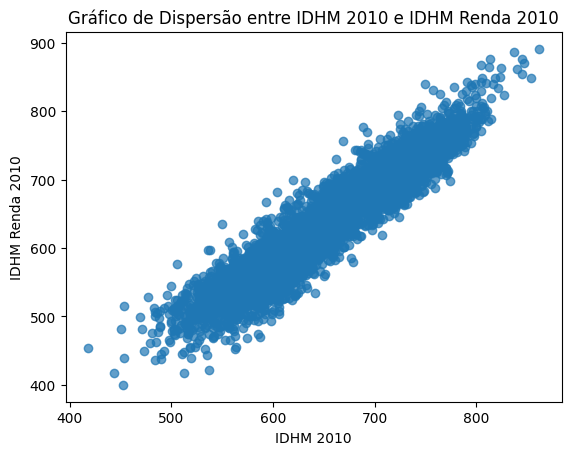

Correlação entre IDHM 2010 e IDHM Renda 2010: 0.9482958188388315


In [89]:
# Converter as colunas para números
Conj_IDH['IDHM 2010'] = pd.to_numeric(Conj_IDH['IDHM 2010'], errors='coerce')
Conj_IDH['IDHM Renda 2010'] = pd.to_numeric(Conj_IDH['IDHM Renda 2010'], errors='coerce')

# Criar um gráfico de dispersão
plt.scatter(Conj_IDH['IDHM 2010'], Conj_IDH['IDHM Renda 2010'], alpha=0.7)
plt.title('Gráfico de Dispersão entre IDHM 2010 e IDHM Renda 2010')
plt.xlabel('IDHM 2010')
plt.ylabel('IDHM Renda 2010')

# Adicionar linha de regressão
z = np.polyfit(Conj_IDH['IDHM 2010'], Conj_IDH['IDHM Renda 2010'], 1)
p = np.poly1d(z)
plt.plot(Conj_IDH['IDHM 2010'], p(Conj_IDH['IDHM 2010']), 'r--')

# Exibir o gráfico
plt.show()

# Calcular a correlação
correlacao = Conj_IDH['IDHM 2010'].corr(Conj_IDH['IDHM Renda 2010'])
print(f"Correlação entre IDHM 2010 e IDHM Renda 2010: {correlacao}")

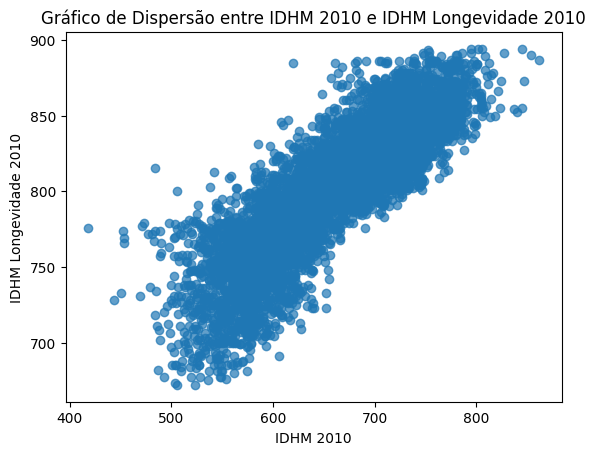

Correlação entre IDHM 2010 e IDHM Longevidade 2010: 0.8521418702948097


In [90]:
# Converter as colunas para números
Conj_IDH['IDHM 2010'] = pd.to_numeric(Conj_IDH['IDHM 2010'], errors='coerce')
Conj_IDH['IDHM Longevidade 2010'] = pd.to_numeric(Conj_IDH['IDHM Longevidade 2010'], errors='coerce')

# Criar um gráfico de dispersão
plt.scatter(Conj_IDH['IDHM 2010'], Conj_IDH['IDHM Longevidade 2010'], alpha=0.7)
plt.title('Gráfico de Dispersão entre IDHM 2010 e IDHM Longevidade 2010')
plt.xlabel('IDHM 2010')
plt.ylabel('IDHM Longevidade 2010')

# Adicionar linha de regressão
z = np.polyfit(Conj_IDH['IDHM 2010'], Conj_IDH['IDHM Longevidade 2010'], 1)
p = np.poly1d(z)
plt.plot(Conj_IDH['IDHM 2010'], p(Conj_IDH['IDHM 2010']), 'r--')

# Exibir o gráfico
plt.show()

# Calcular a correlação
correlacao_longevidade = Conj_IDH['IDHM 2010'].corr(Conj_IDH['IDHM Longevidade 2010'])
print(f"Correlação entre IDHM 2010 e IDHM Longevidade 2010: {correlacao_longevidade}")

In [91]:
# Calcular a média do campo 'IDHM 2010' agrupado por 'Estado'
media_por_estado = Conj_IDH.groupby('Estado')['IDHM 2010'].mean().reset_index()

# Exibir o novo DataFrame
print(media_por_estado)

   Estado   IDHM 2010
0      AC  586.090909
1      AL  563.500000
2      AM  565.112903
3      AP  642.812500
4      BA  593.904077
5      CE  616.630435
6      DF  824.000000
7      ES  692.192308
8      GO  694.983740
9      MA  576.184332
10     MG  667.878077
11     MS  679.705128
12     MT  684.290780
13     PA  581.545455
14     PB  587.654709
15     PE  596.248649
16     PI  571.049107
17     PR  701.959900
18     RJ  708.913043
19     RN  610.850299
20     RO  644.038462
21     RR  610.200000
22     RS  713.530242
23     SC  731.648464
24     SE  596.933333
25     SP  739.527132
26     TO  639.928058


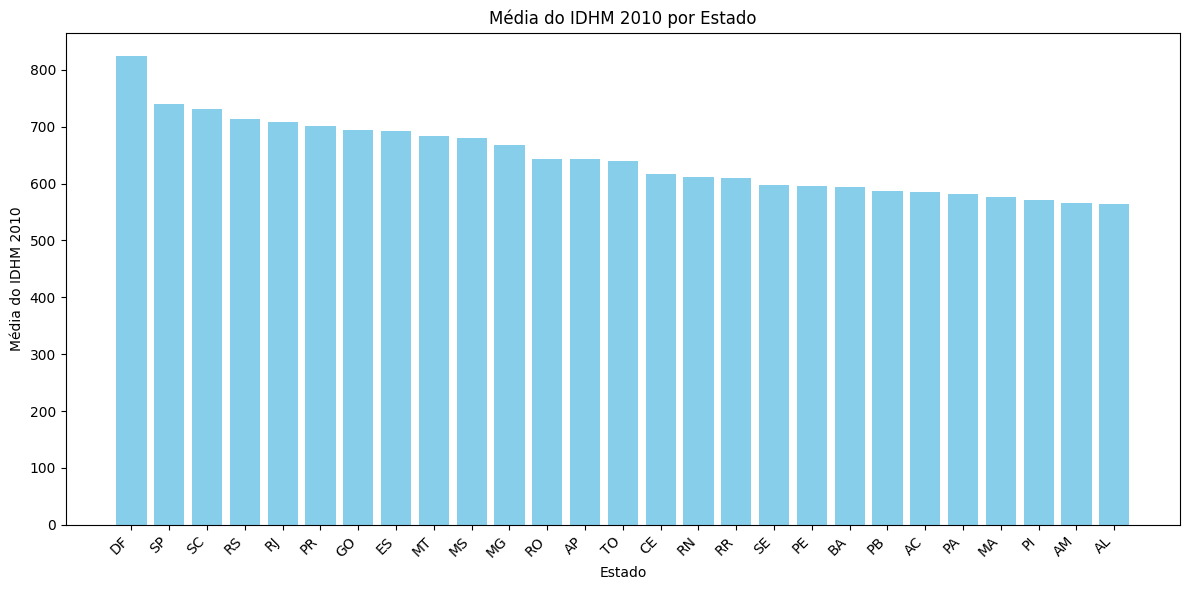

In [92]:
# Ordenar o DataFrame pela média do IDHM de forma decrescente
media_por_estado = media_por_estado.sort_values(by='IDHM 2010', ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(media_por_estado['Estado'], media_por_estado['IDHM 2010'], color='skyblue')
plt.title('Média do IDHM 2010 por Estado')
plt.xlabel('Estado')
plt.ylabel('Média do IDHM 2010')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.tight_layout()

# Exibir o gráfico
plt.show()

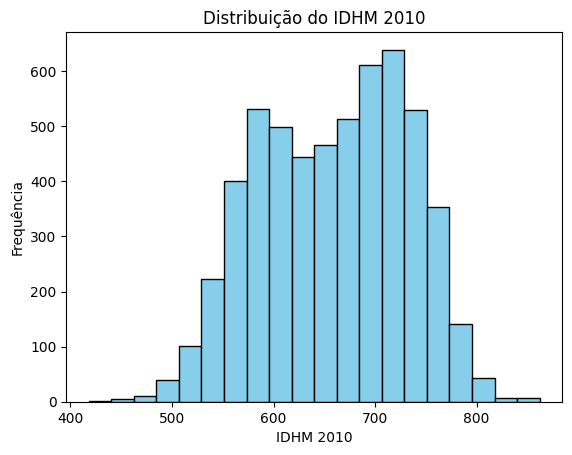

In [93]:
# Criar um histograma para a coluna 'IDHM 2010'
plt.hist(Conj_IDH['IDHM 2010'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição do IDHM 2010')
plt.xlabel('IDHM 2010')
plt.ylabel('Frequência')
plt.show()

<ipython-input-97-bf3f0aefcdae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Estado', y='IDHM 2010', data=Conj_IDH, palette='viridis')


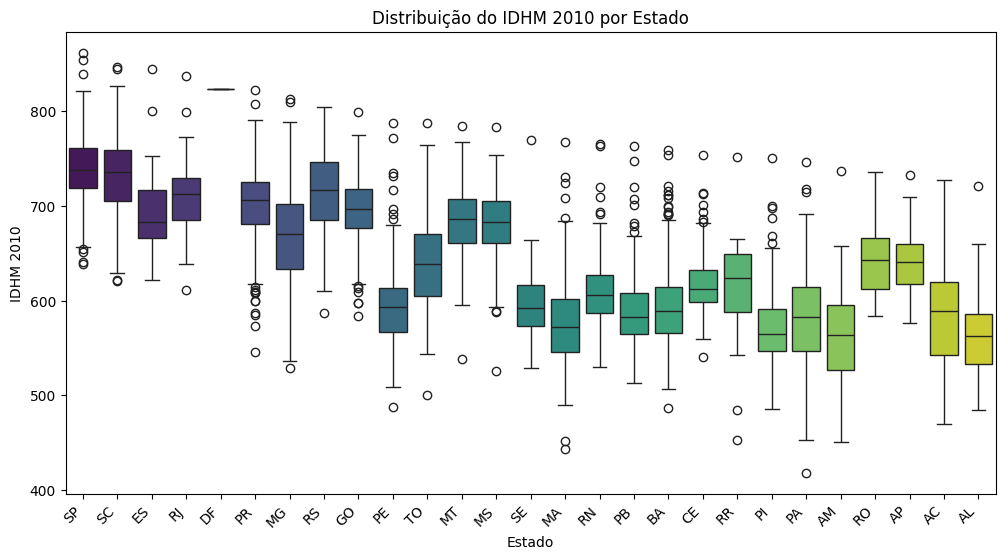

In [97]:
import seaborn as sns

# Criar um boxplot para comparar a distribuição do 'IDHM 2010' por 'Estado'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Estado', y='IDHM 2010', data=Conj_IDH, palette='viridis')
plt.title('Distribuição do IDHM 2010 por Estado')
plt.xlabel('Estado')
plt.ylabel('IDHM 2010')
plt.xticks(rotation=45, ha='right')
plt.show()